In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , Ridge
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
boston = load_boston()
boston_df = pd.DataFrame( boston.data , columns = boston.feature_names)
boston_df['Price'] = boston.target

In [3]:
# boston_df.shape
# boston_df.info()
# boston_df.head(1)

In [4]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [5]:
x = boston_df.drop('Price' , axis = 1)


In [6]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [7]:
y = boston_df.loc[:,'Price']

In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [9]:
x_train , x_test , y_train ,y_test = train_test_split( x , y , 
                                                     test_size = 0.3 , random_state = 3)

In [10]:
reg = LinearRegression()
reg.fit( x_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
type(reg.coef_)

numpy.ndarray

In [12]:
print(reg.coef_)
print(reg.intercept_)
slope = list(reg.coef_)
sign = ['-' if ip < 0 else '+' for ip in slope]
s = ''
for i in range(0,len(slope)):
    s = s + sign[i] + ' ' + str(slope[i]).lstrip('-') + ' '
print(s)
    
#     print( 'The Linear equation is Y = ')

[-1.28899229e-01  4.62536564e-02 -5.41974027e-02  3.83208843e+00
 -1.24514995e+01  3.72790367e+00  7.37824474e-03 -1.19551784e+00
  2.80152377e-01 -7.75364999e-03 -8.27122705e-01  1.25331573e-02
 -5.56644117e-01]
28.744950121672087
- 0.12889922856564193 + 0.04625365637346018 - 0.05419740269623912 + 3.832088428391673 - 12.451499513194701 + 3.7279036729105357 + 0.0073782447423236 - 1.1955178354378078 + 0.2801523771179779 - 0.007753649991246183 - 0.827122705173772 + 0.012533157303228482 - 0.5566441165591411 


In [13]:
# error
y_pred = reg.predict(x_test)
mse = mean_squared_error( y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)

print('The mean square value is ' , mse )
print('The root mean square value is ', rmse )
print('The R2 value is ',r2)

The mean square value is  22.431936070737528
The root mean square value is  4.736236488050141
The R2 value is  0.7147895265576849


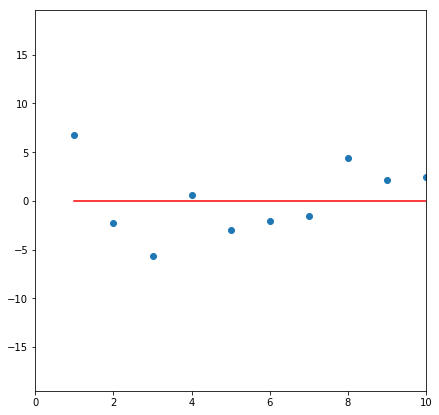

In [17]:
# Residual graph
x1 = [i for i in range(1,len(y_test)+1)]
fig = plt.figure(figsize = (7,7))
plt.scatter( x1, y_test - y_pred ) 
plt.xlim(0,10)
plt.plot( x1 , y_test*0 , color ='red')

In [16]:
pd.DataFrame({'x' : x1 , 'y' : y_test - y_pred}).sort_values(by='x')

,x,y
224,1,6.784715
137,2,-2.232751
453,3,-5.628153
303,4,0.642013
254,5,-2.983812
37,6,-2.058712
442,7,-1.520727
417,8,4.354656
16,9,2.111444
209,10,2.404884


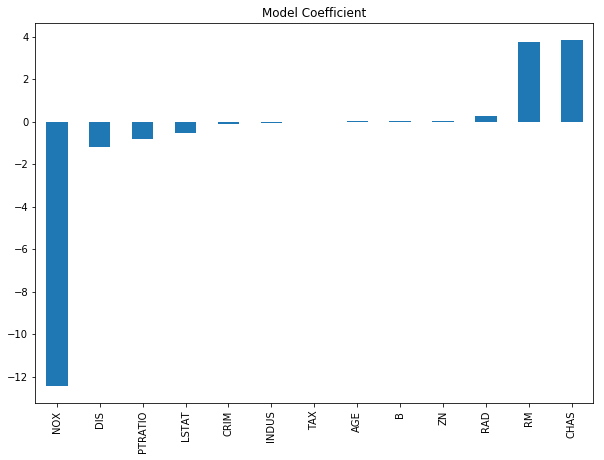

In [17]:
plt.figure(figsize = (10,7) )
predictor = x_train.columns
coef = pd.Series( reg.coef_ , predictor).sort_values()
coef.plot( kind = 'bar' , title = 'Model Coefficient')

In [54]:
# Ridge regression 

from sklearn.linear_model import Ridge
''' alpha is hyperparameter of a Ridge , which means that they are not automatically learned by the model 
instead they have to be set '''

# alpha_range = [0.01 , 0.05 , 0.5 , 5 ]

ridgereg = Ridge(alpha = 0.05 , normalize = True)
ridgereg.fit(x_train , y_train )
pred = ridgereg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test , pred ) )
r2 = r2_score(y_test , pred )
print('RMSE = ' , rmse , 'R2 =  ',r2)

RMSE =  4.8099859419715285 R2 =   0.7058381656181565


In [55]:
df = pd.DataFrame(columns = ['Linear Reg' , 'Ridge Reg' , 'Columns'])

for i in range(len(ridgereg.coef_)):
    df = df.append({'Linear Reg' : reg.coef_[i] , 'Ridge Reg' : ridgereg.coef_[i] , 'Columns' : predictor[i] } , ignore_index = True )

df = df.sort_values(by='Linear Reg')
df

,Linear Reg,Ridge Reg,Columns
4,-12.451500,-9.107753,NOX
7,-1.195518,-0.999075,DIS
10,-0.827123,-0.767271,PTRATIO
12,-0.556644,-0.519870,LSTAT
0,-0.128899,-0.115389,CRIM
2,-0.054197,-0.083776,INDUS
9,-0.007754,-0.003916,TAX
6,0.007378,0.002550,AGE
11,0.012533,0.012221,B
1,0.046254,0.037433,ZN


<BarContainer object of 13 artists>

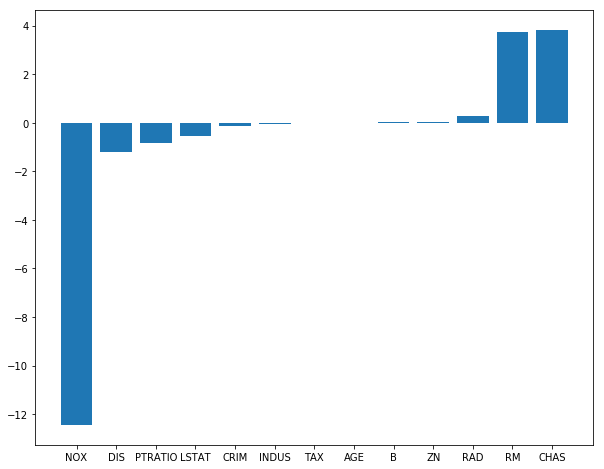

In [52]:
plt.figure(figsize = (10,8))
plt.bar( x ='Columns'  , height = 'Linear Reg' , data = df)

In [48]:
plt.bar?

In [43]:
df.sort_values(by='Linear Reg')

,Linear Reg,Ridge Reg
4,-12.451500,-3.881678
7,-1.195518,-0.416591
10,-0.827123,-0.580968
12,-0.556644,-0.353778
0,-0.128899,-0.079975
2,-0.054197,-0.087935
9,-0.007754,-0.001849
6,0.007378,-0.007221
11,0.012533,0.009449
1,0.046254,0.023740


In [31]:
ridgereg.coef_

array([-7.99749270e-02,  2.37399828e-02, -8.79351862e-02,  3.71880462e+00,
       -3.88167776e+00,  3.46068798e+00, -7.22116793e-03, -4.16591250e-01,
        4.10557126e-02, -1.84911090e-03, -5.80967931e-01,  9.44948515e-03,
       -3.53778024e-01])

In [64]:
# Lasso

# Ridge regression 

from sklearn.linear_model import Lasso
''' alpha is hyperparameter of a Ridge , which means that they are not automatically learned by the model 
instead they have to be set '''

# alpha_range = [0.01 , 0.5 , 0.5 , 5 ]

lassoreg = Lasso(alpha = 0.0001 , normalize = True)
lassoreg.fit(x_train , y_train )
pred = lassoreg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test , pred ) )
r2 = r2_score(y_test , pred )
print('RMSE = ' , rmse , 'R2 =  ',r2)

RMSE =  4.737706970653445 R2 =   0.714612397672054


In [65]:
df = pd.DataFrame(columns = ['Linear Reg' , 'Ridge Reg' , 'Lasso Reg', 'Columns'])

for i in range(len(ridgereg.coef_)):
    df = df.append({'Linear Reg' : reg.coef_[i] , 'Ridge Reg' : ridgereg.coef_[i] 
                    , 'Columns' : predictor[i] , 'Lasso Reg' :lassoreg.coef_[i] } , ignore_index = True )

df = df.sort_values(by='Linear Reg')
df

,Linear Reg,Ridge Reg,Lasso Reg,Columns
4,-12.451500,-9.107753,-12.339188,NOX
7,-1.195518,-0.999075,-1.190939,DIS
10,-0.827123,-0.767271,-0.825523,PTRATIO
12,-0.556644,-0.519870,-0.556493,LSTAT
0,-0.128899,-0.115389,-0.128330,CRIM
2,-0.054197,-0.083776,-0.054799,INDUS
9,-0.007754,-0.003916,-0.007615,TAX
6,0.007378,0.002550,0.007096,AGE
11,0.012533,0.012221,0.012517,B
1,0.046254,0.037433,0.045914,ZN


In [79]:
l = list(df['Columns'].values)


In [81]:
# df.set_index('Columns').plot(kind = 'bar' , figsize = (10,6) )

In [68]:
df.plot?